In [52]:
import logging
logging.getLogger().setLevel(logging.CRITICAL)

In [53]:
import pandas as pd
import numpy as np 
import tensorflow as tf
import seaborn as sb
from sklearn.model_selection import train_test_split
import nltk

In [71]:
dataset1=pd.read_csv("labeled_data.csv")
dataset2=pd.read_csv("labeled_data1.csv")
dataset1.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [72]:
dataset2.head()

,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation


In [74]:
dataset1['class']=dataset1['class'].apply(lambda x:0 if x==2 else 1)

/home/rdev/notebook/jupyterenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

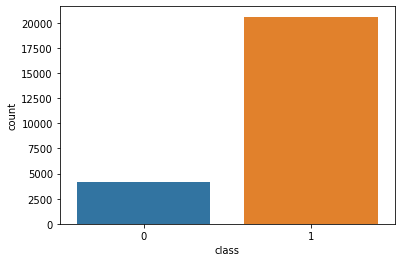

In [76]:
import seaborn as sb
sb.countplot(dataset1['class'])

/home/rdev/notebook/jupyterenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Toxicity', ylabel='count'>

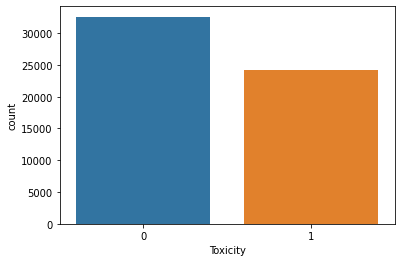

In [78]:
sb.countplot(dataset2['Toxicity'])

<AxesSubplot:>

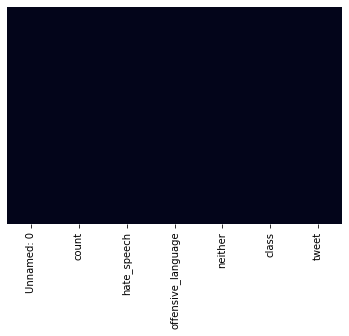

In [80]:
sb.heatmap(dataset1.isnull(),yticklabels=False,cbar=False)

<AxesSubplot:>

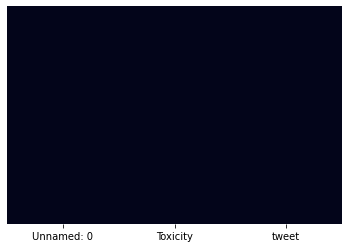

In [81]:
sb.heatmap(dataset2.isnull(),yticklabels=False,cbar=False)

In [83]:
dataset1.shape

(24783, 7)

In [91]:
dataset2.shape

(56745, 3)

In [86]:
import re
def remove_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  
        u"\U0001F300-\U0001F5FF" 
        u"\U0001F680-\U0001F6FF" 
        u"\U0001F1E0-\U0001F1FF" 
                           "]+", flags=re.UNICODE)
    emoji_pattern.sub('',text);
    return text;

In [87]:
def clean_dataset(text):
    sentence=remove_emojis(text)
    sentence=re.sub('[^a-zA-Z]',' ',sentence)
    sentence=re.sub(r'\s+[a-zA-Z]\s+',' ',sentence)
    sentence=re.sub(r'\s+',' ',sentence)
    return sentence

In [88]:
# Preprocessing tweets
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wnl=WordNetLemmatizer()

stop = stopwords.words('english')
dataset1['tweet']=dataset1['tweet'].apply(lambda x: " ".join([x for x in x.split() if x not in stop]))
dataset2['tweet']=dataset2['tweet'].apply(lambda x: " ".join([x for x in x.split() if x not in stop]))

x=[]
for i in dataset1.index:
  temp_list=nltk.word_tokenize(dataset1['tweet'][i])
  dataset1['tweet'][i]=' '.join([wnl.lemmatize(words) for words in temp_list])
  x.append(clean_dataset(dataset1['tweet'][i]))

for i in dataset2.index:
  temp_list=nltk.word_tokenize(dataset2['tweet'][i])
  dataset2['tweet'][i]=' '.join([wnl.lemmatize(words) for words in temp_list])
  x.append(clean_dataset(dataset2['tweet'][i]))

[nltk_data] Downloading package stopwords to /home/rdev/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/rdev/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/rdev/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/rdev/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/rdev/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
/tmp/ipykernel_113800/419724061.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset1['tweet'][i]=' '.join([wnl.lemmatize(words) for

In [90]:
len(x)

81528

In [95]:
y=[]
for i in dataset1.index:
    y.append(dataset1['class'][i])
for i in dataset2.index:
    y.append(dataset2['Toxicity'][i])
len(y)

81528

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [97]:
x_train[0]

' munafal karma bitch'

In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
train_data=vec.fit_transform(x_train)
test_data=vec.transform(x_test)

/home/rdev/notebook/jupyterenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

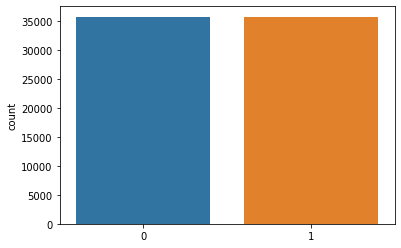

In [100]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(sampling_strategy='minority',random_state=7)
x_oversampled,y_oversampled=sm.fit_resample(train_data,y_train)
sb.countplot(y_oversampled)
# sb.countplot(y)

In [101]:
x_oversampled.shape

(71650, 55387)

In [103]:
from sklearn.svm import SVC
model=SVC(C=1.0,kernel='linear',degree=3)
model.fit(x_oversampled,y_oversampled)

SVC(kernel='linear')

In [108]:
predictions=model.predict(test_data)

In [109]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7358
           1       0.97      0.94      0.95      8948

    accuracy                           0.95     16306
   macro avg       0.95      0.95      0.95     16306
weighted avg       0.95      0.95      0.95     16306

[[7111  247]
 [ 548 8400]]


In [110]:
data=list(y_test)
comments=list(x_test)
for i in range(5):
  print("prediction  - ",predictions[i],"   real - ",data[i])

prediction  -  1    real -  1
prediction  -  1    real -  0
prediction  -  0    real -  0
prediction  -  0    real -  0
prediction  -  1    real -  1


In [116]:
# Predicting on single comment
comment1=input("Enter the comment - ")
comment2=input("Enter 2nd comment - ")
vec1=vec.transform([comment1])
vec2=vec.transform([comment2])
prediction1 = model.predict(vec1)
prediction2 = model.predict(vec2)
print("comment - ",comment1,"   prediction - ",prediction1)
print("comment - ",comment2,"   prediction - ",prediction2)

Enter the comment - My name is ROshan
Enter 2nd comment - DO this or i will kick your ass
comment -  My name is ROshan    prediction -  [0]
comment -  DO this or i will kick your ass    prediction -  [1]


In [118]:
import pickle
pickle.dump(model,open("SVM_model.pkl",'wb'))
pickle.dump(vec,open("vec_model.pkl",'wb'))